In [1]:
# this project is intended to show eigenface implementation

Original Images


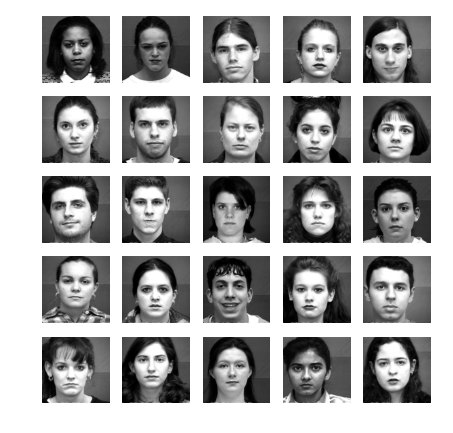

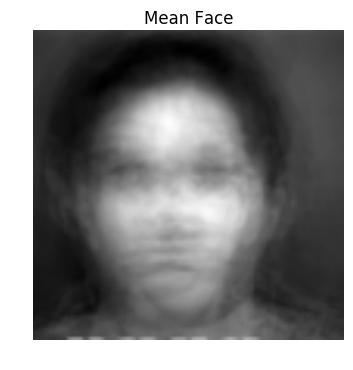

Zero mean faces


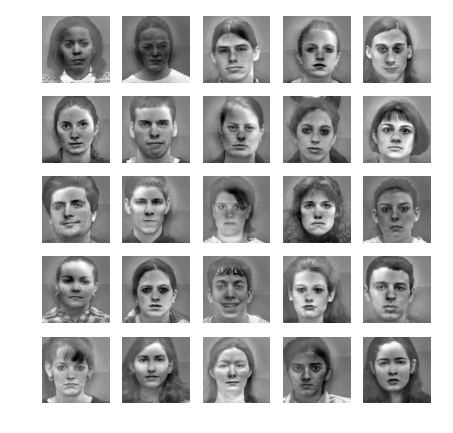

eigrnfaces


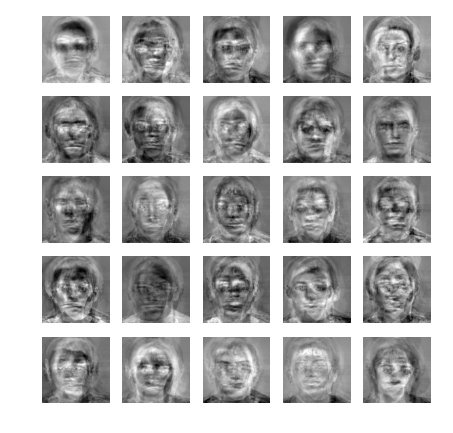

In [2]:
#Task1

from PIL import Image
import scipy.stats
import glob
import numpy as np
from numpy import linalg as la
from pylab import *
import matplotlib.pyplot as plt 
from ipython_utilities import *
from IPython.display import display, HTML

image=[]
flattened_images  =[]
def griddisplay(image_list):
    fig1, axes_array = plt.subplots(5, 5)
    fig1.set_size_inches(5,5)
    k=0
    for row in range(5):
        for col in range(5):    
            im =scipy.misc.imresize(image_list[k],(100,100),interp='bilinear', mode=None)
            image_plot = axes_array[row][col].imshow(im,cmap=plt.cm.gray) 
            axes_array[row][col].axis('off')
            k = k+1
    plt.show()
    
for filename in glob.glob('Eigenfaces/Train/*.jpg'):
    im=Image.open(filename)   
    im= np.asarray(im,dtype=float)/255.0 
    image.append(im)
print('Original Images')
griddisplay(image)
for i in range(len(image)):
    p=image[i].flatten()
    flattened_images.append(p)
A_transpose = np.matrix(flattened_images)
A = np.transpose(A_transpose)

mean= np.mean(A,1)
b= mean.reshape(425,425)
resized_mean = scipy.misc.imresize(np.asarray(b),(100,100),interp='bilinear', mode=None)
imshow(resized_mean,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Mean Face')
plt.show()

zero_mean =[]
column =0
Zero_mean_matrix= np.ones((180625,25))
for values in flattened_images:
    #zm = values-mean
    zm= A[:,column] - mean
    #print("z",zm.shape)
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] =zm
    zm_images = zm.resize(425,425)
    zero_mean.append(zm)
    column = column +1
print('Zero mean faces')
griddisplay(zero_mean)

d = (np.dot(np.transpose(Zero_mean_matrix),Zero_mean_matrix))/425
u_list =[]
w2, v2 = la.eigh(d)

for ev in v2:
    ev_transpose = np.transpose(np.matrix(ev))
    u = np.dot(Zero_mean_matrix,ev_transpose)
    #norms = np.linalg.norm(u, axis=0)                           
    u = u / np.linalg.norm(u)
    #     minu = np.min(u)
    #     maxu = np.max(u)
    #     u = u-float(minu)
    #     u = u/float((maxu-minu)) 
    u_i= u.reshape(425,425)
    u_list.append(u_i)

print('eigrnfaces')
griddisplay(u_list)


		k=2


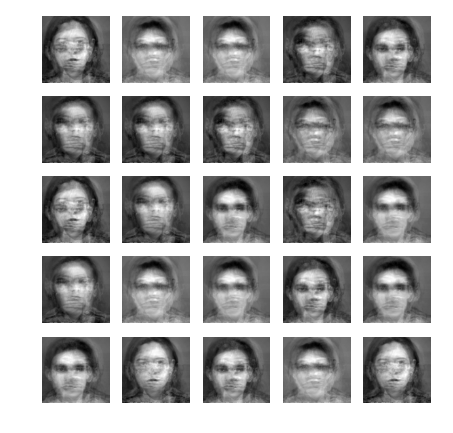

		k=5


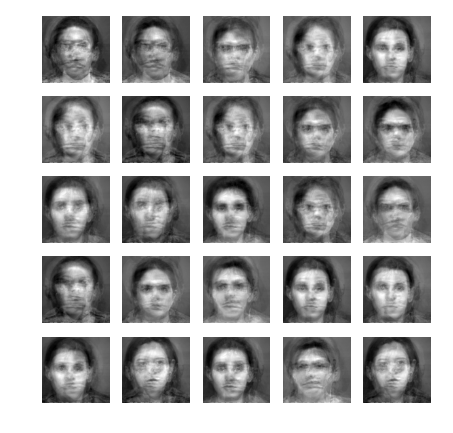

		k=15


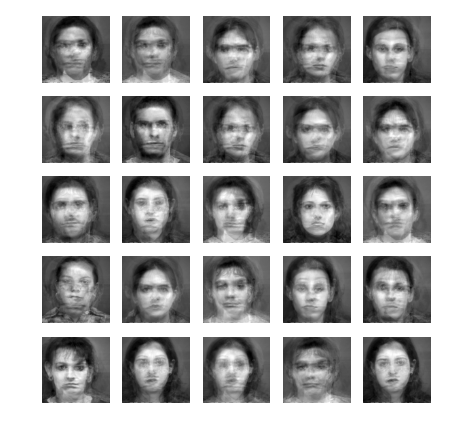

In [3]:
#Task2

dict ={}
def Reconstruct(k, boolean):
    weights=np.zeros((25,k))
    matrixU = np.zeros((180625,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    rec_face=[]
    for face_num in range(0,25):
        w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])
        #w = Zero_mean_matrix[:,face_num]*np.transpose(matrixU)  
        weights[face_num,:] =w
        #face=np.zeros((1, 180625))
        #         face = np.dot(w[0], matrixU[:,0])
        #         for i in range(1,k):
        #             face = face + np.dot(w[i], matrixU[:,i])
        #         #print(face.shape)
        #         face = face+np.transpose(mean)

        face = np.dot(w, np.transpose(matrixU))
        minf = np.min(face)
        maxf = np.max(face)
        face = face-float(minf)
        face = face/float((maxf-minf))
        face = face+np.transpose(mean)
        reshape_face = face.reshape(425,425)
        rec_face.append( reshape_face)
    if boolean is True:
        griddisplay(rec_face)
    dict[k] = weights

print('\t\tk=2')
Reconstruct(2,True)
print('\t\tk=5')
Reconstruct(5,True)
print('\t\tk=15')
Reconstruct(15,True)


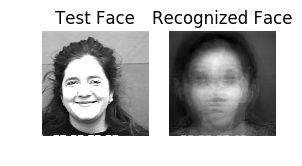

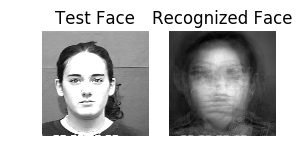

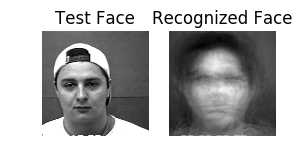

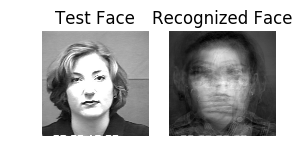

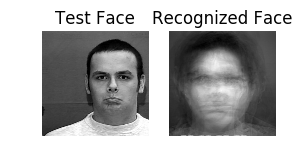

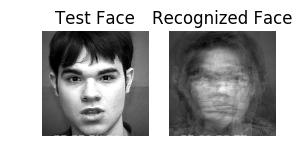

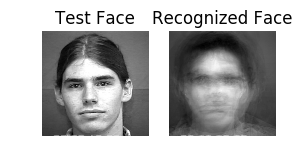

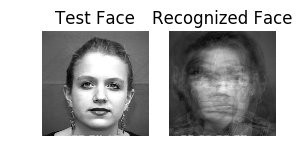

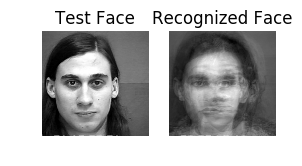

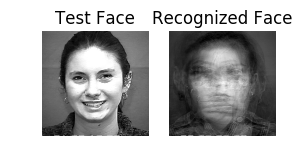

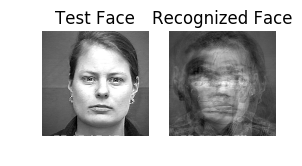

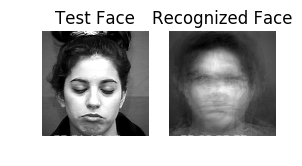

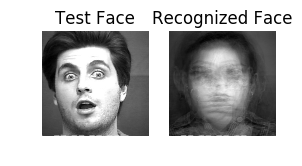

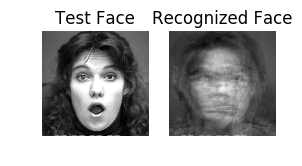

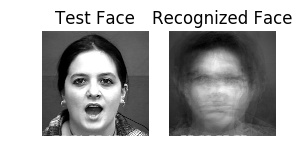

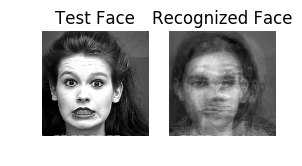

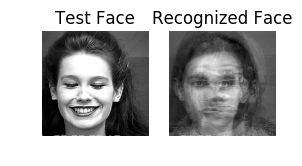

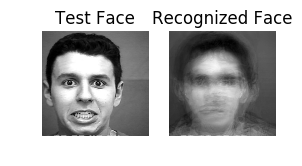

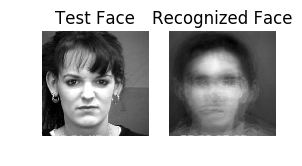

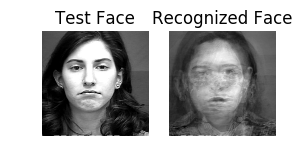

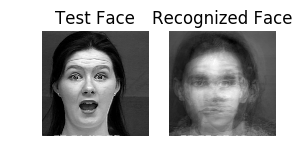

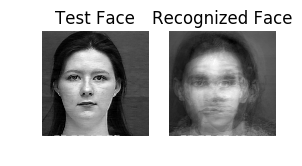

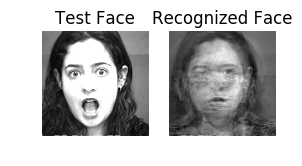

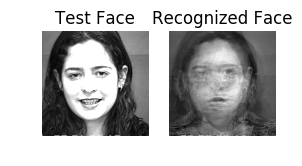

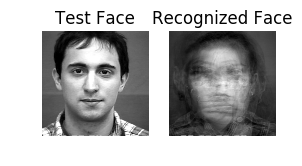

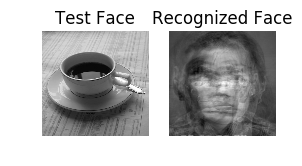

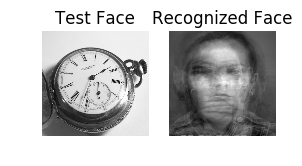

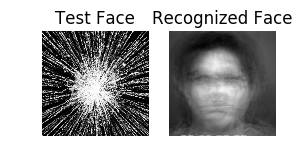

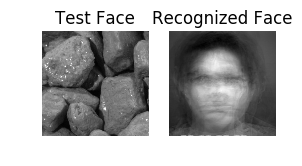

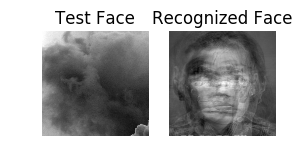

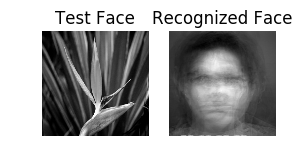

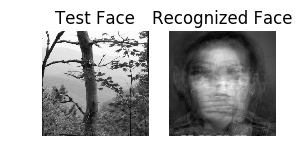

		k=5


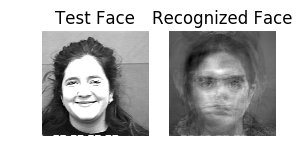

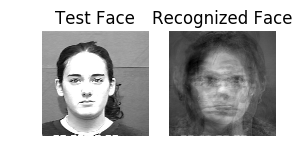

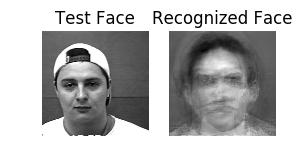

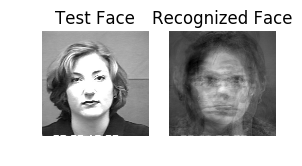

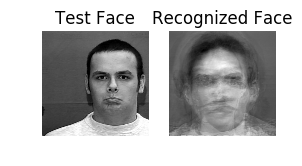

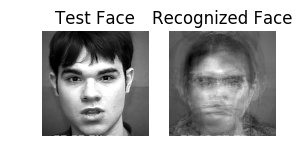

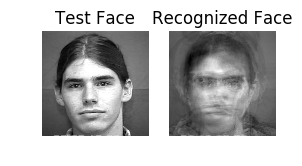

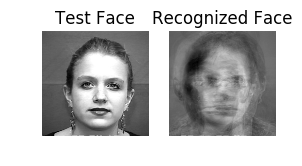

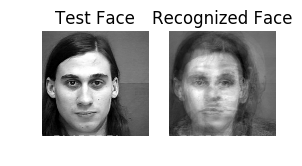

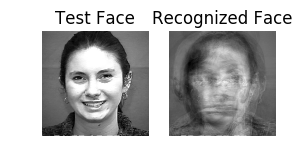

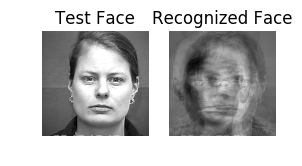

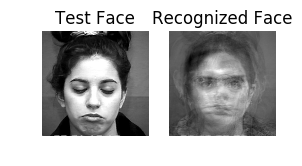

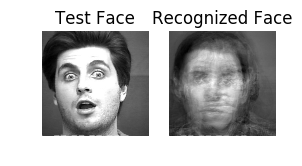

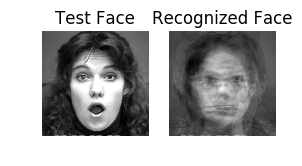

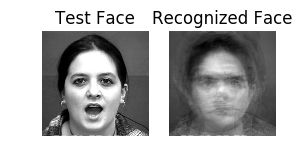

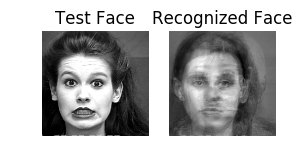

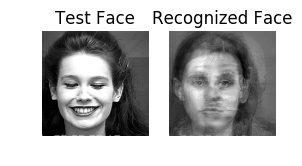

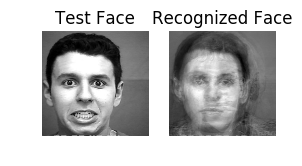

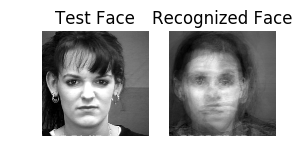

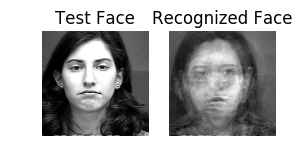

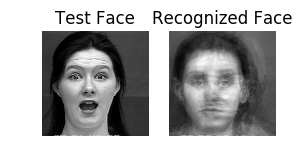

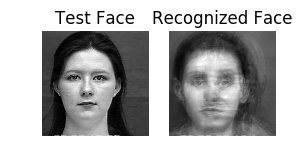

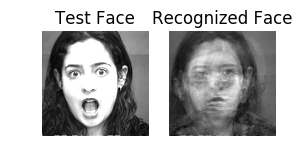

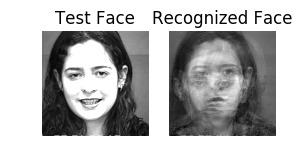

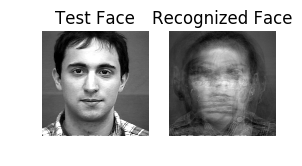

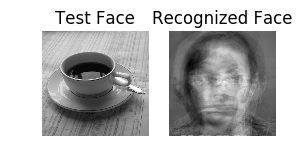

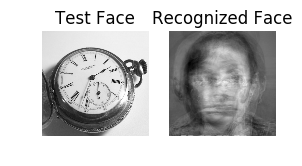

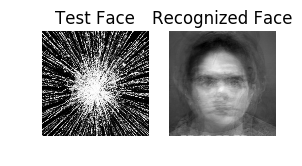

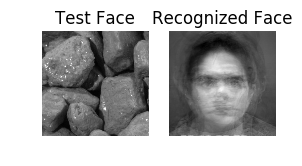

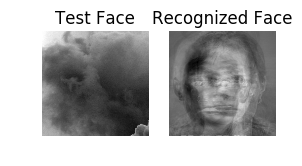

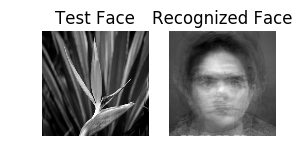

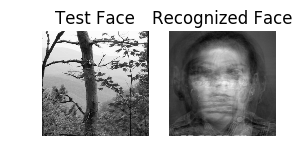

		k=15


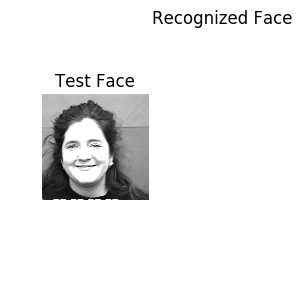

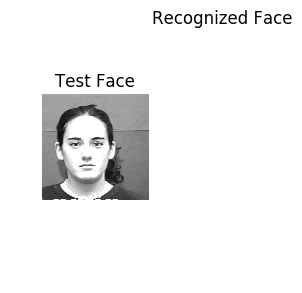

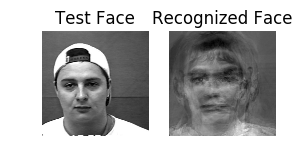

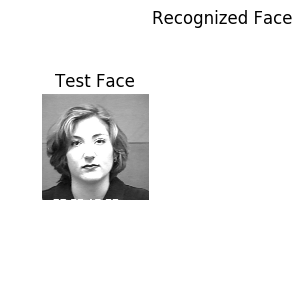

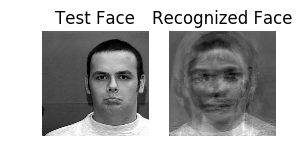

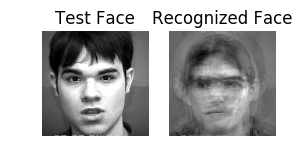

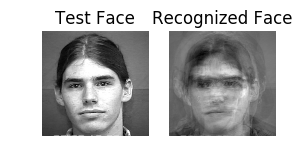

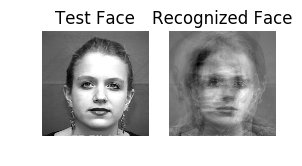

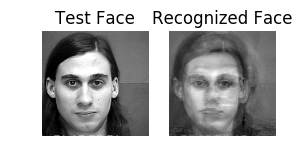

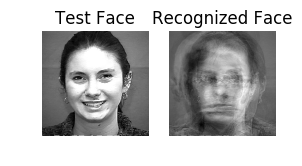

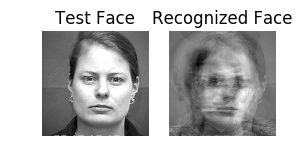

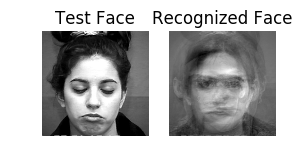

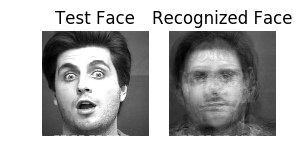

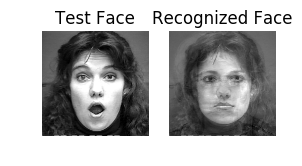

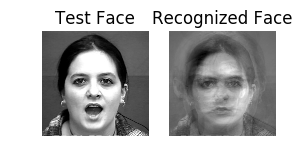

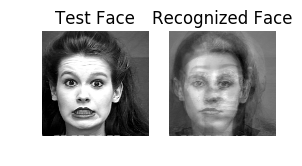

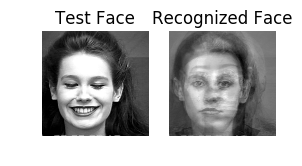

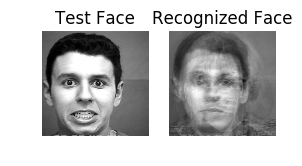

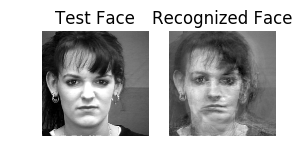

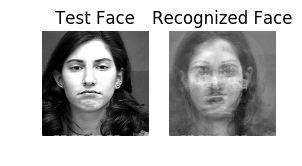

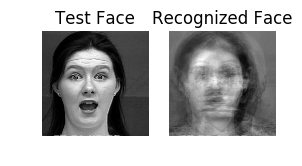

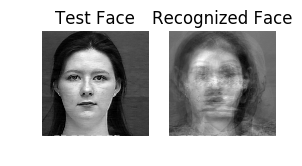

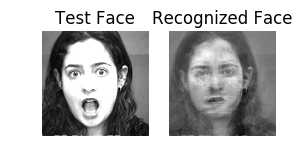

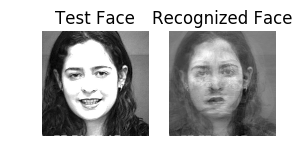

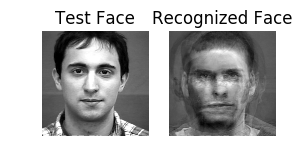

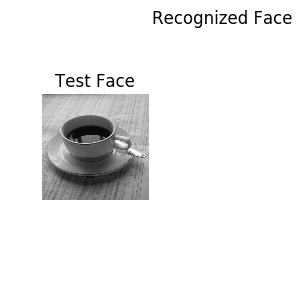

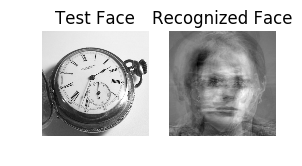

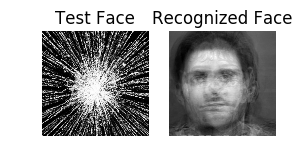

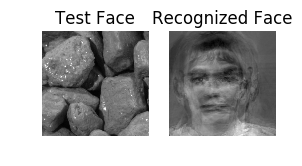

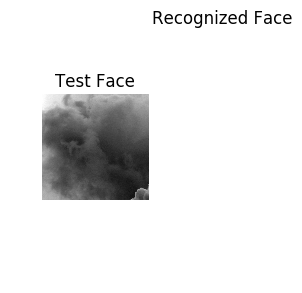

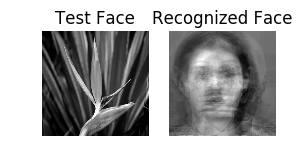

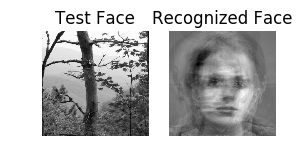

In [4]:
#Task 3
test_images=[]
for filename in glob.glob('Eigenfaces/Test/*.jpg'):
    im=Image.open(filename).convert('L')
    im= np.asarray(im,dtype=float)/255.0 
    test_images.append(im)
def Project(k,zero_mean_test,threshold):
    matrixU = np.zeros((180625,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    w = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
    original_w_k =dict[k]
    dist =[]
    for wt_vectors in original_w_k:
        dist.append(np.linalg.norm(wt_vectors-w.T))

    nearest_face = np.argmin(dist)
    nearest_face_weights = original_w_k[nearest_face]
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(3,3)
    zero_mean_test =zero_mean_test + np.transpose(mean)
    zero_mean_test = zero_mean_test.reshape(425,425)
    image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Test Face')

    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face+np.transpose(mean)
    reshape_face = face.reshape(425,425)
    if np.min(dist)<threshold:  #Nonface
        image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Recognized Face')
    plt.show()
    
def runs(k):
    for num in range(0,len(test_images)):#t in test_images:
        t = test_images[num]
        test = t.flatten()
        zero_mean_test = test-np.transpose(mean)
        Project(k,zero_mean_test,80)  #threshold =80

runs(2)
print('\t\tk=5')
runs(5)
print('\t\tk=15')
runs(15)

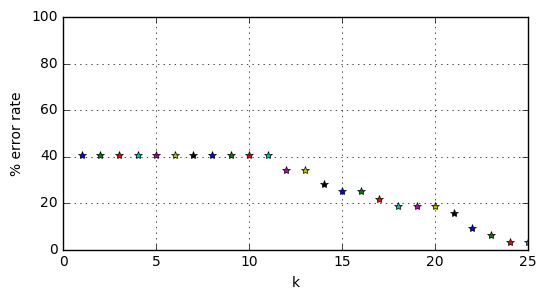

In [5]:
#Task 4
def Error(k,threshold):
    Nonfaces = 13
    total_images =32
    nf_detected =0
    matrixU = np.zeros((180625,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    for t in test_images:
        test = t.flatten()
        zero_mean_test = test-np.transpose(mean)
        w = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
        original_w_k =dict[k]
        dist =[]
        for wt_vectors in original_w_k:
            dist.append(np.linalg.norm(wt_vectors-w.T))
        if np.min(dist) >threshold:
            nf_detected = nf_detected+1
    error_percentage = ((Nonfaces - nf_detected)/total_images)*100
    return error_percentage

xt =[]
for x in range(1,26):
    Reconstruct(x,False)
    xt.append(x)
#print(x)
#xt=[2,5,15]


fig, axes1 = plt.subplots(1, 1)
fig.set_size_inches(6,3)
for x_pts in xt:
    y= Error(x_pts,80)
    axes1.plot(x_pts, y,marker='*')
axes1.set(xlabel="k",ylabel="% error rate",ylim=(0,100),xlim=(0,25))
plt.grid(True)
plt.show()
